In [2]:
import numpy as np
from qiskit import QuantumCircuit

Must run this code using the SageMath app in launchpad. Open using Jupyter notebook. 
... or just go [here](https://sagecell.sagemath.org/)

In [4]:
# PhiPlus = vector([1/sqrt(2), 0, 0, 1/sqrt(2)]).column()    
# H = 1/sqrt(2) * Matrix([[1,1],[1,-1]])            
# S = Matrix([[1,0],[0,e^(i*pi/2)]])                                
# T = Matrix([[1,0],[0,e^(i*pi/4)]])        
# Tdg = Matrix([[1,0],[0,e^(-i*pi/4)]])        
# Eye = Matrix([[1,0],[0,1]]) 
# H.tensor_product(H) * Eye.tensor_product(Tdg) * Eye.tensor_product(H) * Eye.tensor_product(S) * PhiPlus
# Eye.tensor_product(H) * Eye.tensor_product(T) * Eye.tensor_product(H) * Eye.tensor_product(S) * PhiPlus

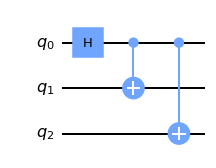

In [3]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# display(circ.draw('mpl'))
circ.draw('mpl')

In [13]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [14]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

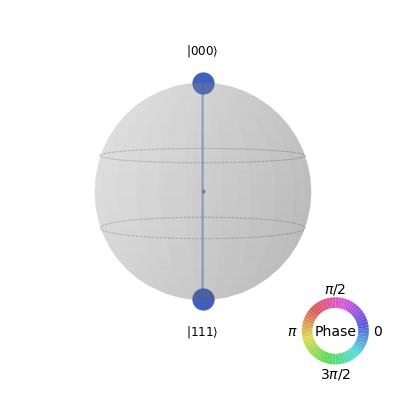

In [18]:
state.draw('qsphere')

In [1]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')